# Task for Today  

***

## Hand Gesture Classification  

Given *tabular data about four hand gestures*, let's try to classify the **gesture** of a given example.

We will use a TensorFlow ANN to make our predictions.

# Getting Started

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import classification_report, confusion_matrix

In [155]:
# import the dataset to train and evaluate the model
dfs = [] #for PCA features
dfs.append(pd.read_csv(r"our_input_30/global_pca.csv"))
# dfs.append(pd.read_csv(r"our_input_subject2/global_pca3.csv"))
for df in dfs:
    df.columns = list(range(len(df.columns)))
data= pd.concat([df for df in dfs], axis=0).reset_index(drop=True) 

In [156]:
# import the new dataset we want to apply the classifier on
df_mix=[]
df_mix.append(pd.read_csv(r"our_input_30/mix_pca2.csv",header=None))
for dfs in df_mix:
    dfs.columns = list(range(len(dfs.columns)))
df_mix= pd.concat(df_mix, axis=0).reset_index(drop=True)

# Splitting/Scaling

In [157]:
# extraction for features 3PC
X = df.drop(2,axis=1)
y = df.iloc[:, 2]              # output required

#extraction for mixed serie
X_mix = df_mix.drop(2,axis=1)
y_mix = df_mix.iloc[:, 2]              # output required

In [158]:
X

,0,1
0,5.186696,-0.282449
1,2.270144,0.922515
2,7.351414,-0.815896
3,7.281085,-0.349993
4,8.960811,-0.766667
...,...,...
212,0.247641,0.351363
213,1.826329,0.038614
214,0.220924,-0.118857
215,-0.570330,1.030801


In [159]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
212    6.0
213    6.0
214    6.0
215    6.0
216    6.0
Name: 2, Length: 217, dtype: float64

In [160]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_mix = scaler.fit_transform(X_mix)

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

# Training

In [162]:
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(1024, activation='relu')(inputs)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(7, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

batch_size = 32
epochs = 30 #50 before

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.2485 - loss: 1.8608 - val_accuracy: 0.3226 - val_loss: 1.6836 - learning_rate: 0.0010
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2981 - loss: 1.5062 - val_accuracy: 0.3226 - val_loss: 1.5531 - learning_rate: 0.0010
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2833 - loss: 1.4175 - val_accuracy: 0.3871 - val_loss: 1.4275 - learning_rate: 0.0010
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3754 - loss: 1.2947 - val_accuracy: 0.3226 - val_loss: 1.3525 - learning_rate: 0.0010
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4171 - loss: 1.2252 - val_accuracy: 0.3871 - val_loss: 1.3454 - learning_rate: 0.0010
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5037 - loss: 1.1206 - val_accuracy: 0.2581 - val_loss: 1.3769 - learning_rate: 0.0010
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5294 - loss: 1.1159 - val_accuracy: 0.4194 

# Results

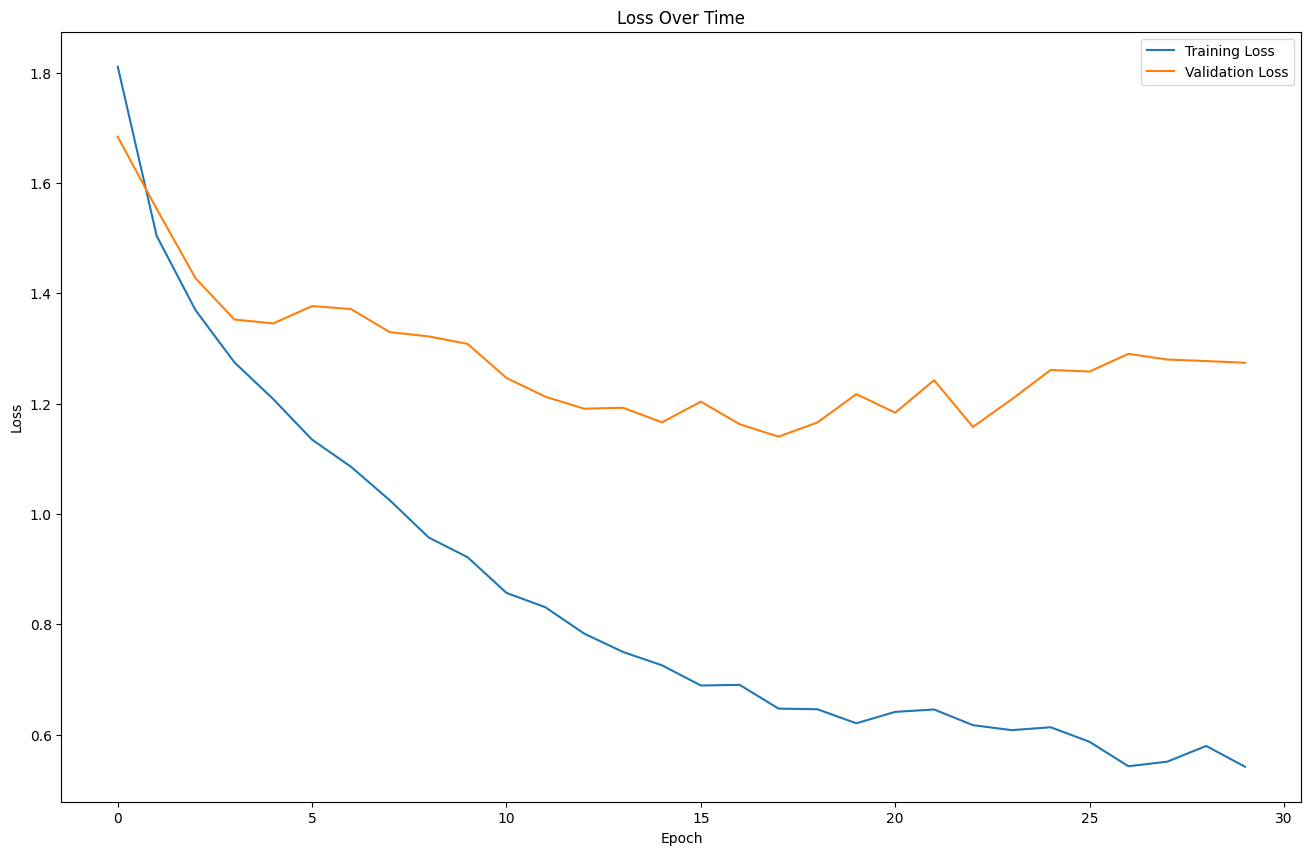

In [163]:
plt.figure(figsize=(16, 10))

plt.plot(range(epochs), history.history['loss'], label="Training Loss")
plt.plot(range(epochs), history.history['val_loss'], label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Over Time")

plt.show()

In [164]:
model.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4534 - loss: 1.0972 


[1.022939920425415, 0.4848484992980957]

In [165]:
y_true = np.array(y_test)
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [166]:
# apply it to the mix movement serie 
y_true_mix = np.array(y_mix)
y_pred_mix = np.array(list(map(lambda x: np.argmax(x), model.predict(X_mix))))
accuracy_score(y_mix,y_pred_mix)
df = pd.DataFrame(y_pred_mix)
print(accuracy_score(y_mix,y_pred_mix))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
0.42857142857142855


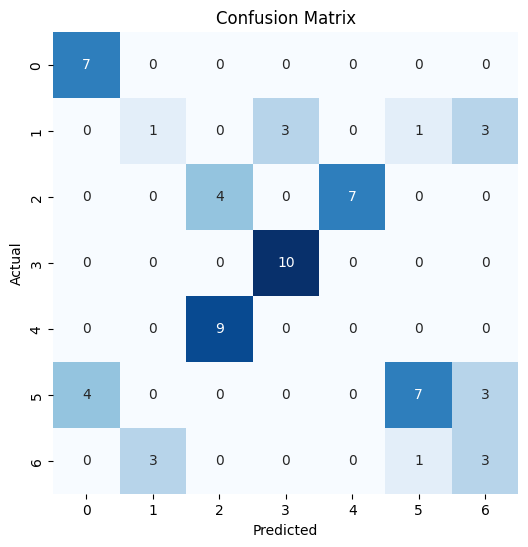

In [167]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [168]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.64      1.00      0.78         7
         1.0       0.25      0.12      0.17         8
         2.0       0.31      0.36      0.33        11
         3.0       0.77      1.00      0.87        10
         4.0       0.00      0.00      0.00         9
         5.0       0.78      0.50      0.61        14
         6.0       0.33      0.43      0.38         7

    accuracy                           0.48        66
   macro avg       0.44      0.49      0.45        66
weighted avg       0.47      0.48      0.46        66



# Data Every Day  

This notebook is featured on Data Every Day, a YouTube series where I train models on a new dataset each day.  

***

Check it out!  
https://youtu.be/8HLUmsMV2ho